In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dash
from dash.dependencies import Input, Output
from dash import dcc, html
import plotly.graph_objs as go
import pickle
import os

# import custom module
import scrubbing as scrb

# prevent logging when fitting Prophet models
import logging
logger = logging.getLogger('cmdstanpy')
logger.addHandler(logging.NullHandler())
logger.propagate = False
logger.setLevel(logging.CRITICAL)

In [4]:
# Specify the directory path
directory = r"Plotly Figures/Raw Time Series"

# Get a list of all file names in the directory
variables = [x[:-4] for x in os.listdir(directory)]

# Print the list of file names
print(variables)

['Unemployment Level', 'Payroll Employment', 'CPI-U', 'HourlyPrecipitation', 'Energy Demand (MWH)', 'Labor Force Participation', 'HourlyRelativeHumidity', 'Labor Force Level', 'Civilian Noninstitutional Population', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature', 'Employment Population Ratio', 'Energy Price (cents-KWH)', 'HourlyWetBulbTemperature', 'HourlyWindSpeed', 'Unemployment Rate', 'HourlyStationPressure', 'Employment Level']


# Load Data From EIA, NOAA, and BLS

In [10]:
%run get_data.py "2018-06-19" "2024-02-01"
# run python script to load data and save to Datasets/prelim.csv

Requesting energy demand data from EIA over 10 requests
Requesting energy price data from EIA
Requesting Weather Data from NOAA
Requesting data from Bereau of Labor Statistics


# Show Summary Information about Preliminary Dataset

In [3]:
# display summary of dataset
preliminary_data = pd.read_csv(r"Datasets/preliminary.csv", index_col=0)
desciptions = preliminary_data.describe().round(2)
cols_per_table = 6
for n in range(0,int(np.ceil(desciptions.shape[1]/cols_per_table))):
    # print(n*cols_per_table, (n*cols_per_table)+cols_per_table)
    display(desciptions.iloc[:,n*cols_per_table : (n*cols_per_table)+cols_per_table])

,Energy Demand (MWH),HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlyStationPressure
count,49627.00,47372.00,47381.00,44674.00,47372.00,47171.00
mean,5708.19,43.11,57.21,0.01,62.31,29.88
std,1224.60,19.12,16.84,0.05,19.59,0.23
min,0.00,-17.00,2.00,0.00,7.00,28.71
25%,4815.00,28.00,44.00,0.00,47.00,29.73
50%,5544.00,45.00,58.00,0.00,61.00,29.88
75%,6284.00,60.00,72.00,0.00,78.00,30.04
max,11069.00,79.00,95.00,3.47,100.00,30.59


,HourlyWetBulbTemperature,HourlyWindSpeed,Energy Price (cents/KWH),CPI-U,Unemployment Rate,Unemployment Level
count,47145.00,40215.00,47779.00,49266.00,48523.00,48523.00
mean,50.52,4.99,19.84,295.43,7.14,293521.00
std,15.63,19.62,1.96,17.72,3.97,156851.54
min,0.00,0.00,16.85,273.84,3.30,140697.00
25%,38.00,3.00,18.38,279.47,4.30,183574.00
50%,51.00,5.00,19.29,289.49,5.40,222617.00
75%,64.00,7.00,21.20,313.88,9.90,409961.00
max,81.00,2237.00,23.95,328.01,21.50,836383.00


,Employment Level,Labor Force Level,Employment Population Ratio,Labor Force Participation,Civilian Noninstitutional Population,Payroll Employment
count,48523.00,48523.00,48523.00,48523.00,48523.00,48523.00
mean,3853778.76,4147299.76,55.76,59.99,6915693.82,4465.78
std,238814.31,103952.79,3.58,1.72,174856.23,260.26
min,3046955.00,3707014.00,42.90,52.00,6641170.00,3748.60
25%,3712627.00,4085159.00,54.30,59.60,6746032.00,4225.70
50%,3897289.00,4122588.00,57.40,60.10,6918967.00,4563.10
75%,4076332.00,4254770.00,57.90,60.90,7107466.00,4661.90
max,4141201.00,4322118.00,59.10,62.80,7131615.00,4756.70


# Split dataset into training and holdout sets

In [4]:
prelim_training_data = scrb.split_preliminary_dataset(prelim_dataset=preliminary_data)

# Show Raw Time Series Plots

In [5]:
# produce plots showing each variable as a time series
scrb.raw_time_series_plots(prelim_training_data=prelim_training_data)


# dash app to show time series plot for a single variable at a time

# Transform Variables

In [6]:
transformed_data = scrb.transform_variables(prelim_training_data)

# Show Outliers

In [7]:
# identify outliers
outliers_removed_data = scrb.identify_outliers(transformed_training_data=transformed_data)

/home/tobi/Desktop/Capstone/EnergyDemandForecasting/scrubbing.py:441: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/home/tobi/Desktop/Capstone/EnergyDemandForecasting/scrubbing.py:441: RuntimeWarning:

invalid value encountered in scalar divide



In [19]:
# Define available options for the dropdown menu
path_to_plots = r"Plotly Figures/Outlier Detection"
dropdown_options = []
for variable in preliminary_data.columns:
    file_variable = variable.replace(r"/", "-")
    dropdown_options.append({"label":variable, "value":"{}/{}.pkl".format(path_to_plots, file_variable)})


# Initialize the Dash app
app = dash.Dash(__name__)


# Layout of the Dash app
app.layout = html.Div(children=[
    dcc.Dropdown(
        id='figure-dropdown',
        options=dropdown_options,
        value=dropdown_options[0]['value']  # Default value
    ),
    html.Div([], id='output-graph')
])

# Callback to update the displayed graph based on dropdown selection
@app.callback(
    Output('output-graph', 'children'),
    [Input('figure-dropdown', 'value')]
)
def update_graph(selected_figure):
    # Unpickle the selected figure
    with open(selected_figure, 'rb') as f:
        figure_data = pickle.load(f)

    # Create the Plotly figure
    figure = go.Figure(figure_data)

    # Convert the Plotly figure to a Dash graph object
    graph = dcc.Graph(
        id='example-graph',
        figure=figure
    )

    return graph

# Run the Dash app
if __name__ == '__main__':
    app.run(debug=True, host='127.0.0.1')


# Remove Outliers, Impute Missing Values, Transform Variables

In [13]:
# run function to clean dataset
clean_data = scrb.impute_missing_values(outliers_removed_data=outliers_removed_data)

Interpolating for variable Energy Demand (MWH)
Interpolating for variable HourlyDewPointTemperature
Interpolating for variable HourlyDryBulbTemperature
Interpolating for variable HourlyRelativeHumidity
Interpolating for variable HourlyStationPressure
Interpolating for variable HourlyWetBulbTemperature
Interpolating for variable HourlyWindSpeed
Interpolating for variable Energy Price (cents/KWH)
Interpolating for variable CPI-U
Interpolating for variable Unemployment Rate
Interpolating for variable Unemployment Level
Interpolating for variable Employment Level
Interpolating for variable Labor Force Level
Interpolating for variable Employment Population Ratio
Interpolating for variable Labor Force Participation
Interpolating for variable Civilian Noninstitutional Population
Interpolating for variable Payroll Employment
Interpolating for variable HourlyPrecipitation


In [15]:
# check that there are no missing values:
display(clean_data.isna().sum(axis=0))

Energy Demand (MWH)                        0
HourlyDewPointTemperature                  0
HourlyDryBulbTemperature                   0
HourlyPrecipitation                     3519
HourlyRelativeHumidity                     0
HourlyStationPressure                      0
HourlyWetBulbTemperature                   0
HourlyWindSpeed                            0
Energy Price (cents/KWH)                   0
CPI-U                                      0
Unemployment Rate                          0
Unemployment Level                         0
Employment Level                           0
Labor Force Level                          0
Employment Population Ratio                0
Labor Force Participation                  0
Civilian Noninstitutional Population       0
Payroll Employment                         0
dtype: int64

In [16]:
display(clean_data["HourlyPrecipitation"].mode())

0    None
Name: HourlyPrecipitation, dtype: category
Categories (4, object): ['None' < 'Light Rain' < 'Medium Rain' < 'Heavy Rain']

# Show Distributions for each Variable

In [22]:
# run function to produce distribution plots
scrb.distribution_plots(clean_training_data=clean_data)

In [24]:
# dash app to show one distribution plot at a time
# Define available options for the dropdown menu
import base64
from PIL import Image
path_to_plots = r"Static Visuals/Distributions"
dropdown_options = []
for variable in preliminary_data.columns:
    file_variable = variable.replace(r"/", "-")
    dropdown_options.append({"label":variable, "value":"{}/{}.png".format(path_to_plots, file_variable)})

# Initialize the Dash app
app = dash.Dash(__name__)

# Resize images to this width
IMAGE_WIDTH = 750

# Layout of the Dash app
app.layout = html.Div([
    dcc.Dropdown(
        id='image-dropdown',
        options=dropdown_options,
        value=dropdown_options[0]['value']  # Default value
    ),
    html.Div(id='output-image')
])

# Callback to update the displayed image based on dropdown selection
@app.callback(
    Output('output-image', 'children'),
    [Input('image-dropdown', 'value')]
)
def update_image(selected_image):
    # Read the image file
    with open(selected_image, 'rb') as f:
        img = Image.open(f)
        # Resize the image while preserving aspect ratio
        img.thumbnail((IMAGE_WIDTH, IMAGE_WIDTH))
        # Convert the image to RGBA if it's not already in that mode
        img = img.convert('RGBA')
        # Create a white background image to place the resized image on
        bg = Image.new('RGBA', (IMAGE_WIDTH, IMAGE_WIDTH), (255, 255, 255, 255))
        bg.paste(img, (int((IMAGE_WIDTH - img.width) / 2), int((IMAGE_WIDTH - img.height) / 2)), img)
        # Save the resized and centered image to a temporary file
        temp_image_path = 'temp.png'
        bg.save(temp_image_path)

    # Encode the resized image to base64 format
    with open(temp_image_path, 'rb') as f:
        encoded_image = base64.b64encode(f.read()).decode('utf-8')

    # Create an HTML img element with the encoded image
    image_element = html.Img(src='data:image/png;base64,{}'.format(encoded_image))

    # Delete the temporary image file
    os.remove(temp_image_path)

    return image_element

# Run the Dash app
if __name__ == '__main__':
    app.run(debug=True, host='127.0.0.1')

# Show Scatter Plot between each Variable and Energy Demand

Text(0.5, 1.0, 'Correlations Between Variables')

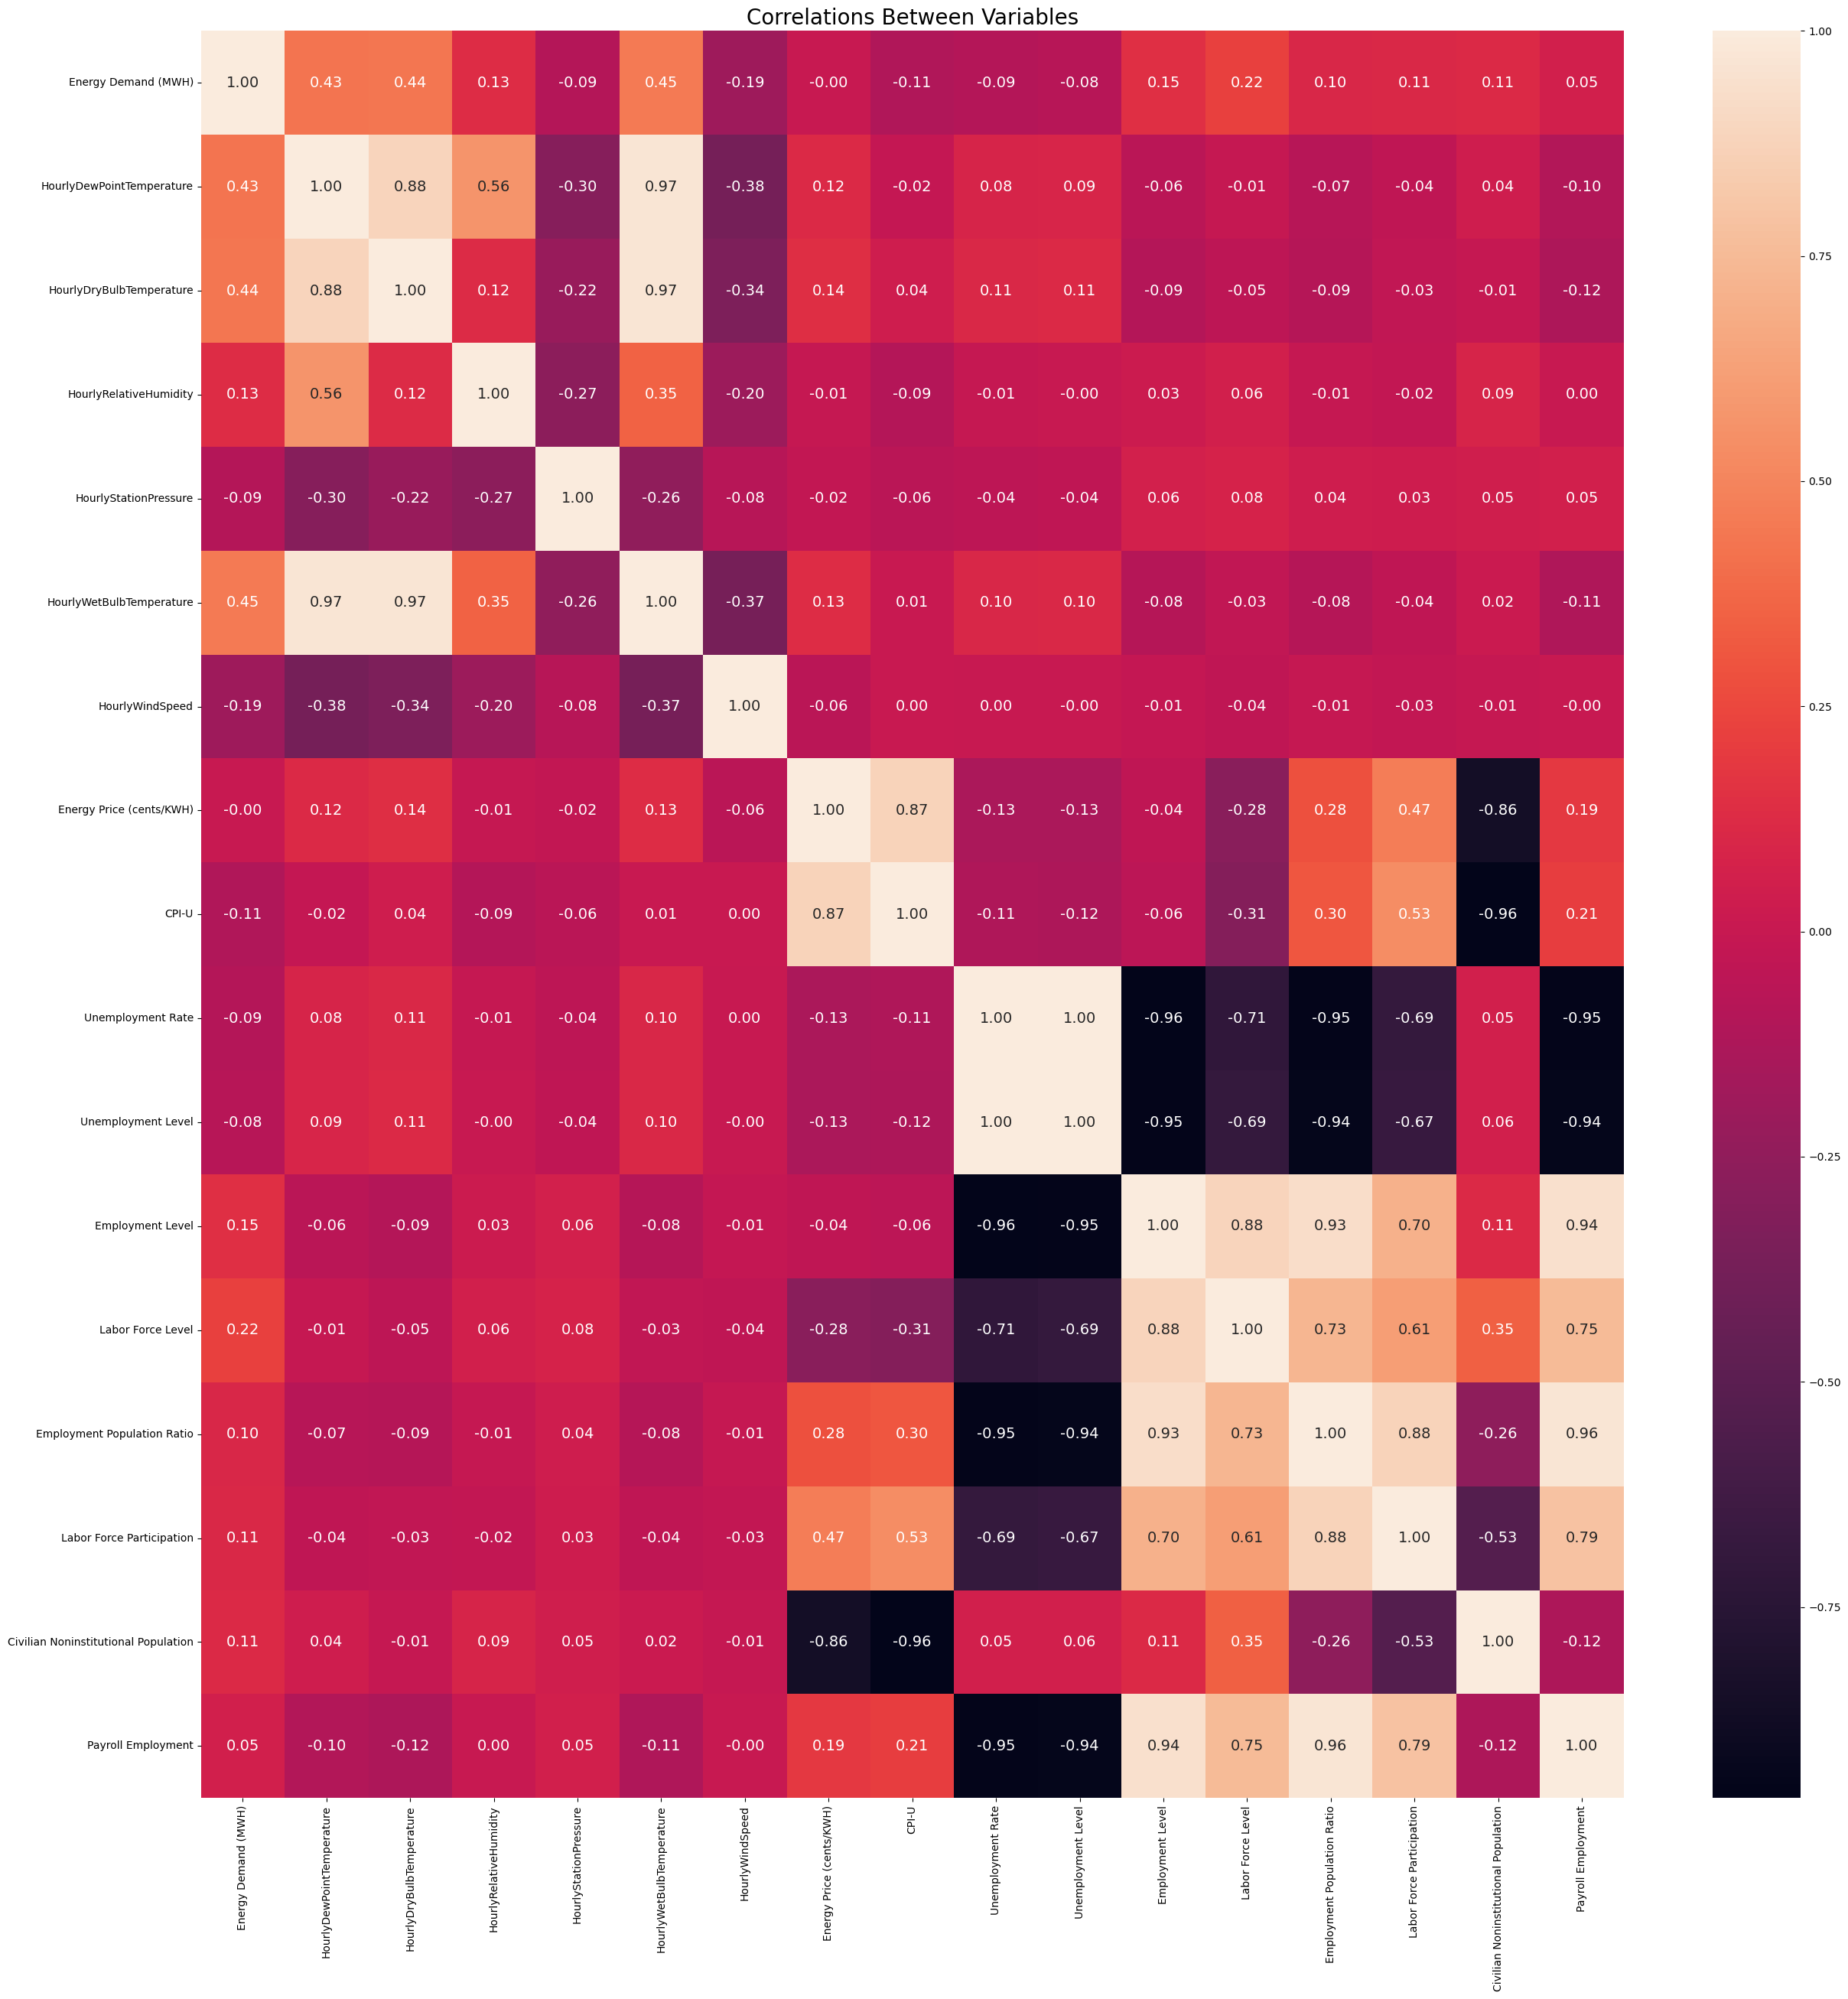

In [35]:
correlations = clean_data.select_dtypes("number").corr()
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot()
sns.heatmap(correlations, annot=True, fmt=".2f", annot_kws={"fontsize":14})
plt.fontsize=20
plt.title("Correlations Between Variables", size=20)

/tmp/ipykernel_69082/172421980.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



HourlyPrecipitation
None           5719.993587
Light Rain     5574.826468
Medium Rain    5761.394213
Heavy Rain     7073.586207
Name: Energy Demand (MWH), dtype: float64

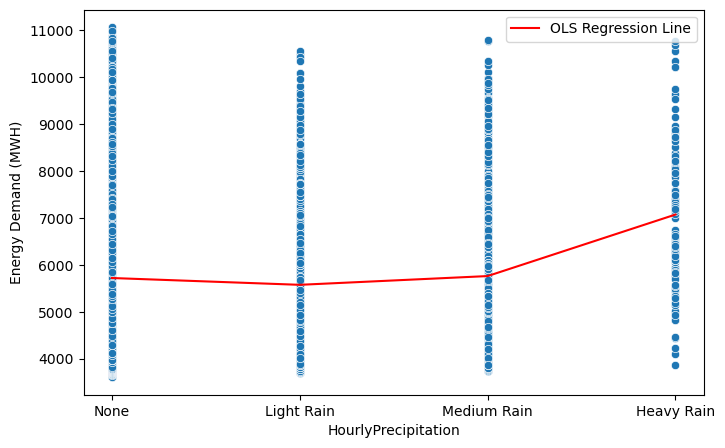

In [33]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot()
sns.scatterplot(data=clean_data, x="HourlyPrecipitation", y="Energy Demand (MWH)")
means = clean_data.groupby(by=["HourlyPrecipitation"])["Energy Demand (MWH)"].mean()
sns.lineplot(means, label="OLS Regression Line", color="red")
ax.legend()
plt.show()

In [36]:
# run function to produce correlation plots
scrb.scatterplots(clean_training_data=clean_data)

/home/tobi/Desktop/Capstone/EnergyDemandForecasting/scrubbing.py:305: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [41]:
# dash app to show one scatter plot at a time
# dash app to show one distribution plot at a time
# Define available options for the dropdown menu
import base64
from PIL import Image
path_to_plots = r"Static Visuals/Scatterplots"
dropdown_options = []
for variable in preliminary_data.columns:
    file_variable = variable.replace(r"/", "-")
    dropdown_options.append({"label":variable, "value":"{}/{}.png".format(path_to_plots, file_variable)})

# Initialize the Dash app
app = dash.Dash(__name__)

# Resize images to this width
IMAGE_WIDTH = 750

# Layout of the Dash app
app.layout = html.Div([
    dcc.Dropdown(
        id='image-dropdown',
        options=dropdown_options,
        value=dropdown_options[0]['value']  # Default value
    ),
    html.Div(id='output-image')
])

# Callback to update the displayed image based on dropdown selection
@app.callback(
    Output('output-image', 'children'),
    [Input('image-dropdown', 'value')]
)
def update_image(selected_image):
    # Read the image file
    with open(selected_image, 'rb') as f:
        img = Image.open(f)
        # Resize the image while preserving aspect ratio
        img.thumbnail((IMAGE_WIDTH, IMAGE_WIDTH))
        # Convert the image to RGBA if it's not already in that mode
        img = img.convert('RGBA')
        # Create a white background image to place the resized image on
        bg = Image.new('RGBA', (IMAGE_WIDTH, IMAGE_WIDTH), (255, 255, 255, 255))
        bg.paste(img, (int((IMAGE_WIDTH - img.width) / 2), int((IMAGE_WIDTH - img.height) / 2)), img)
        # Save the resized and centered image to a temporary file
        temp_image_path = 'temp.png'
        bg.save(temp_image_path)

    # Encode the resized image to base64 format
    with open(temp_image_path, 'rb') as f:
        encoded_image = base64.b64encode(f.read()).decode('utf-8')

    # Create an HTML img element with the encoded image
    image_element = html.Img(src='data:image/png;base64,{}'.format(encoded_image))

    # Delete the temporary image file
    os.remove(temp_image_path)

    return image_element

# Run the Dash app
if __name__ == '__main__':
    app.run(debug=True, host='127.0.0.1')

# Show Time Series Decomposition for each Variable

In [38]:
# run function to produce (and save) time series decomposition plots
scrb.time_series_decompositions(clean_training_data=clean_data)

# dash app to show one time series decomposition plot at a time

/home/tobi/Desktop/Capstone/EnergyDemandForecasting/scrubbing.py:387: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/home/tobi/Desktop/Capstone/EnergyDemandForecasting/scrubbing.py:398: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/home/tobi/Desktop/Capstone/EnergyDemandForecasting/scrubbing.py:387: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/home/tobi/Desktop/Capstone/EnergyDemandForecasting/scrubbing.py:398: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/home/tobi/Desktop/Capstone/EnergyDemandForecasting/scrubbing.py:387: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



,Energy Demand (MWH),HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlyStationPressure,HourlyWetBulbTemperature,HourlyWindSpeed,Energy Price (cents/KWH),CPI-U,Unemployment Rate,Unemployment Level,Employment Level,Labor Force Level,Employment Population Ratio,Labor Force Participation,Civilian Noninstitutional Population,Payroll Employment
2018-06-19 05:00:00,944.824431,14.760497,11.669587,None,7.453571,-0.219036,13.153285,3.102395,-0.481971,0.021224,-0.509639,-9066.131743,1452.023943,2432.888048,0.073359,-0.017881,-66.321294,9.544267
2018-06-19 06:00:00,878.754744,12.663937,12.162274,None,0.493808,-0.219115,11.892795,2.885194,-0.480820,0.019975,-0.510230,-9098.898844,1547.897036,2484.807871,0.074616,-0.017077,-69.726183,9.611090
2018-06-19 07:00:00,850.262551,11.633423,13.107193,None,-4.170236,-0.227942,11.396762,0.000000,-0.479743,0.018500,-0.510974,-9135.707272,1656.436268,2545.821720,0.076055,-0.016160,-72.290629,9.689725
2018-06-19 08:00:00,857.560358,9.699446,12.587466,None,-7.824761,-0.232496,9.723725,0.000000,-0.478640,0.018248,-0.511819,-9174.806703,1772.587362,2612.559366,0.077710,-0.015063,-86.835631,9.783181
2018-06-19 09:00:00,885.916058,11.845286,9.838335,None,2.881135,-0.210734,9.983678,3.195787,-0.477463,0.019080,-0.512738,-9216.062668,1894.923731,2683.425467,0.079538,-0.013819,-111.636729,9.889321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-24 00:00:00,-491.140772,-6.743601,-0.524008,None,-14.618923,0.139267,-3.955383,4.774991,0.475721,0.578054,-0.111165,-8752.403882,-23491.370810,-27019.959179,-0.431147,-0.381572,1756.753354,-14.313415
2023-07-24 01:00:00,-385.282019,-4.731842,-0.004949,None,-11.695255,0.143569,-2.707581,1.808015,0.475703,0.571489,-0.109769,-8700.755074,-23526.414859,-27003.551121,-0.432265,-0.381923,1822.601564,-14.366730
2023-07-24 02:00:00,-196.401021,-3.719658,-0.519586,None,-8.759813,0.156150,-2.480608,2.905499,0.475999,0.569596,-0.108174,-8641.723665,-23580.498371,-26998.951528,-0.433309,-0.382066,1846.847627,-14.414087
2023-07-24 03:00:00,-163.815838,-3.732448,-0.093374,None,-9.798739,0.175769,-2.284855,4.020885,0.476626,0.571743,-0.106380,-8576.201362,-23652.686627,-27006.429059,-0.434325,-0.382056,1835.526805,-14.458273


In [40]:
# Define available options for the dropdown menu
import base64
from PIL import Image
path_to_plots = r"Static Visuals/Decompositions"
dropdown_options = []
for variable in prelim_training_data.select_dtypes("number").columns:
    file_variable = variable.replace(r"/", "-")
    dropdown_options.append({"label":variable, "value":"{}/{}.png".format(path_to_plots, file_variable)})

# Initialize the Dash app
app = dash.Dash(__name__)

# Resize images to this width
IMAGE_WIDTH = 750

# Layout of the Dash app
app.layout = html.Div([
    dcc.Dropdown(
        id='image-dropdown',
        options=dropdown_options,
        value=dropdown_options[0]['value']  # Default value
    ),
    html.Div(id='output-image', style={'height': '800px'})
])

# Callback to update the displayed image based on dropdown selection
@app.callback(
    Output('output-image', 'children'),
    [Input('image-dropdown', 'value')]
)
def update_image(selected_image):
    # Read the image file
    with open(selected_image, 'rb') as f:
        img = Image.open(f)
        # Resize the image while preserving aspect ratio
        img.thumbnail((IMAGE_WIDTH, IMAGE_WIDTH))
        # Convert the image to RGBA if it's not already in that mode
        img = img.convert('RGBA')
        # Create a white background image to place the resized image on
        bg = Image.new('RGBA', (IMAGE_WIDTH, IMAGE_WIDTH), (255, 255, 255, 255))
        bg.paste(img, (int((IMAGE_WIDTH - img.width) / 2), int((IMAGE_WIDTH - img.height) / 2)), img)
        # Save the resized and centered image to a temporary file
        temp_image_path = 'temp.png'
        bg.save(temp_image_path)

    # Encode the resized image to base64 format
    with open(temp_image_path, 'rb') as f:
        encoded_image = base64.b64encode(f.read()).decode('utf-8')

    # Create an HTML img element with the encoded image
    image_element = html.Img(src='data:image/png;base64,{}'.format(encoded_image))

    # Delete the temporary image file
    os.remove(temp_image_path)

    return image_element

# Run the Dash app
if __name__ == '__main__':
    app.run(debug=True, host='127.0.0.1')

# Fit and Tune VARMA-GARCH Model on Prophet residuals

In [ ]:
# run function to tune VARMA-GARCH model and return best set of hyperparameters
# run function to fit (and save) VARMA-GARCH model using best set of hyperparameters

# dash app to show results?

In [51]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

data = outliers_removed_data.copy()
# Example data
variable = "Energy Demand (MWH)"
df = outliers_removed_data[[variable]].reset_index().rename(columns={"index":"ds", variable:"y"})

# Create and fit Prophet model
model = Prophet(seasonality_mode='additive')
model.fit(df)

21:06:36 - cmdstanpy - INFO - Chain [1] start processing
21:06:49 - cmdstanpy - INFO - Chain [1] done processing


In [80]:
display(df['y'].values - forecasts["yhat"].values)

array([1097.79760612, 1031.10947482, 1002.06386487, ...,  355.57183045,
        337.38301839,  292.14943932])

In [83]:
forecasts = model.predict(df)
forecasts.index = pd.to_datetime(outliers_removed_data.index)
forecasts['y'] = df['y'].values
forecasts["residual"] = df["y"].values - forecasts["yhat"].values

In [90]:
display((forecasts==-np.inf).sum())

ds                            0
trend                         0
yhat_lower                    0
yhat_upper                    0
trend_lower                   0
trend_upper                   0
additive_terms                0
additive_terms_lower          0
additive_terms_upper          0
daily                         0
daily_lower                   0
daily_upper                   0
weekly                        0
weekly_lower                  0
weekly_upper                  0
yearly                        0
yearly_lower                  0
yearly_upper                  0
multiplicative_terms          0
multiplicative_terms_lower    0
multiplicative_terms_upper    0
yhat                          0
y                             0
residual                      0
dtype: int64

/home/tobi/miniforge3/envs/Capstone/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/tobi/miniforge3/envs/Capstone/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/tobi/miniforge3/envs/Capstone/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/tobi/miniforge3/envs/Capstone/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/tobi/miniforge3/envs/Capstone/lib/python3.11/site-

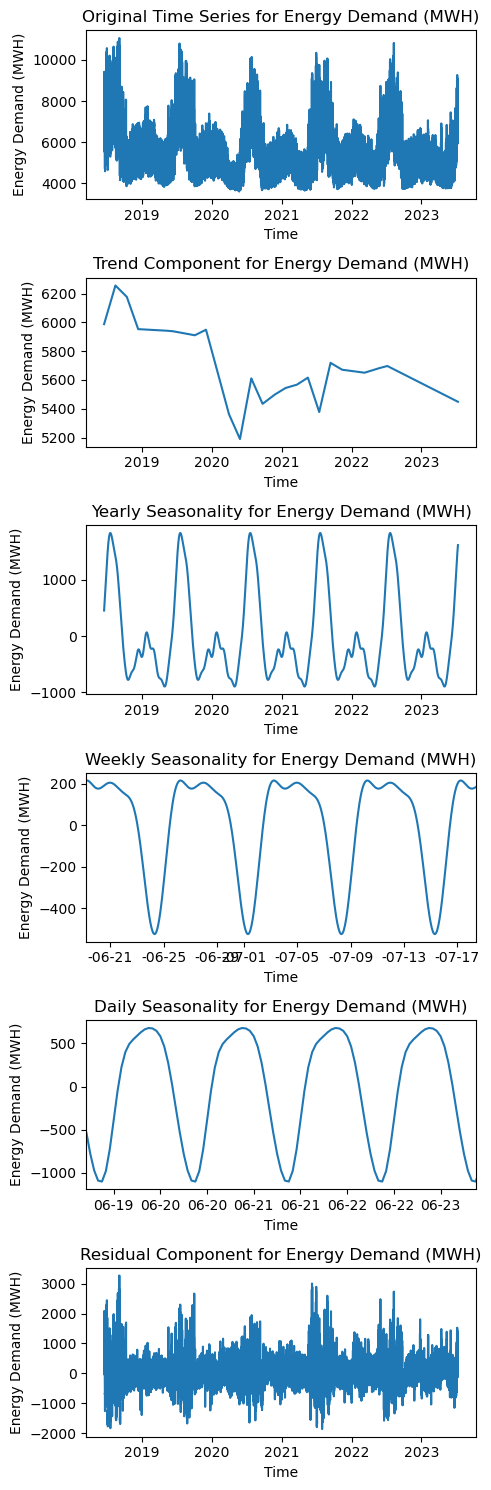

In [110]:
import seaborn as sns

# define figure
fig = plt.figure(figsize=(5,15))

# plot original time series
ax = fig.add_subplot(6,1,1)
sns.lineplot(x=forecasts["ds"].index, y=forecasts['y'])
ax.set_title("Original Time Series for {}".format(variable))
ax.set_xlabel("Time")
ax.set_ylabel(variable)

# plot trend component
ax = fig.add_subplot(6,1,2)
sns.lineplot(x = forecasts["ds"], y=forecasts["trend"])
ax.set_title("Trend Component for {}".format(variable))
ax.set_xlabel("Time")
ax.set_ylabel(variable)

# plot yearly seasonality
ax = fig.add_subplot(6,1,3)
sns.lineplot(x = forecasts["ds"], y=forecasts["yearly"])
ax.set_title("Yearly Seasonality for {}".format(variable))
ax.set_xlabel("Time")
ax.set_ylabel(variable)

# plot weekly seasonality
ax = fig.add_subplot(6,1,4)
sns.lineplot(x = forecasts["ds"], y=forecasts["weekly"])
ax.set_title("Weekly Seasonality for {}".format(variable))
ax.set_xlabel("Time")
ax.set_ylabel(variable)
# change axis limits
ax.set_xlim(forecasts["ds"].iloc[0], forecasts["ds"].iloc[100*7])
labels = [str(x)[-8:-2] for x in ax.get_xticklabels()]
ax.set_xticklabels(labels)

# plot daily seasonlity
ax = fig.add_subplot(6,1,5)
sns.lineplot(x = forecasts["ds"], y=forecasts["daily"])
ax.set_title("Daily Seasonality for {}".format(variable))
ax.set_xlabel("Time")
ax.set_ylabel(variable)
# change axis limits
ax.set_xlim(forecasts["ds"].iloc[0], forecasts["ds"].iloc[100])
labels = [str(x)[-10:-5] for x in ax.get_xticklabels()]
ax.set_xticklabels(labels)

# plot residual component
ax = fig.add_subplot(6,1,6)
sns.lineplot(x = forecasts["ds"], y=forecasts["residual"])
ax.set_title("Residual Component for {}".format(variable))
ax.set_xlabel("Time")
ax.set_ylabel(variable)

# save figure
plt.tight_layout()
fig.show()